In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [20]:
mall_data = pd.read_csv(r'C:\Users\VICTOR ONUZURUIGBO\Downloads\Mall_Customers.csv')

In [21]:
mall_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [28]:
# Analysis

In [29]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


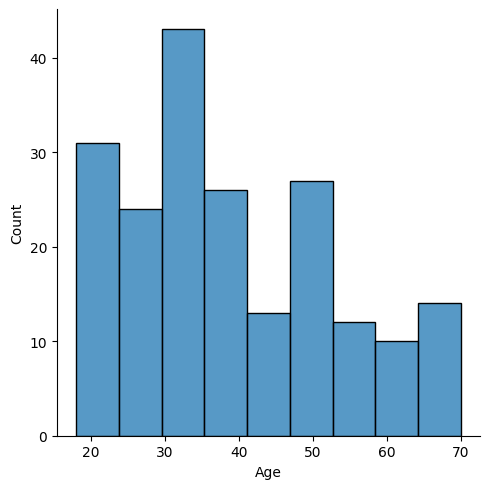

In [30]:
sns.displot(mall_data['Age'])

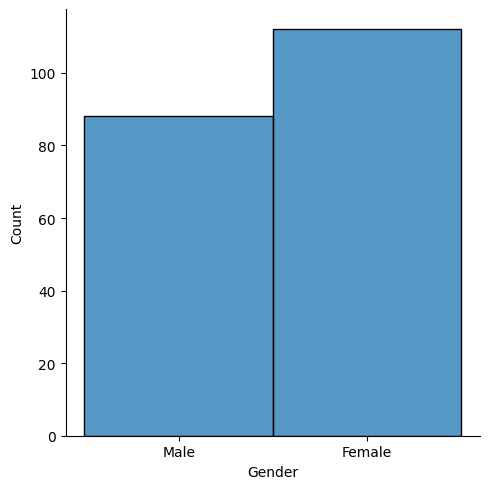

In [31]:
sns.displot(mall_data['Gender'])

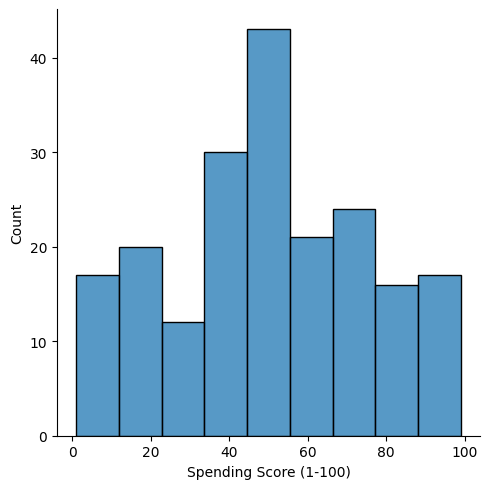

In [32]:
sns.displot(mall_data['Spending Score (1-100)'])

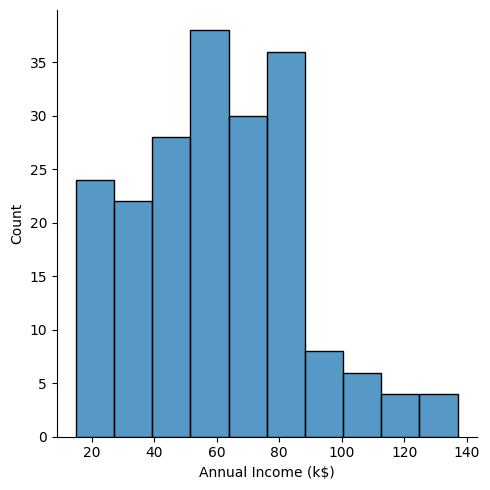

In [33]:
sns.displot(mall_data['Annual Income (k$)'])

<Axes: xlabel='Annual Income (k$)', ylabel='Age'>

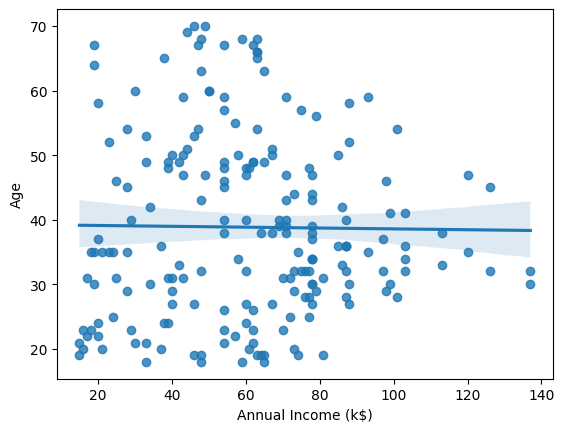

In [39]:
sns.regplot(x= mall_data['Annual Income (k$)'], y= mall_data['Age'])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

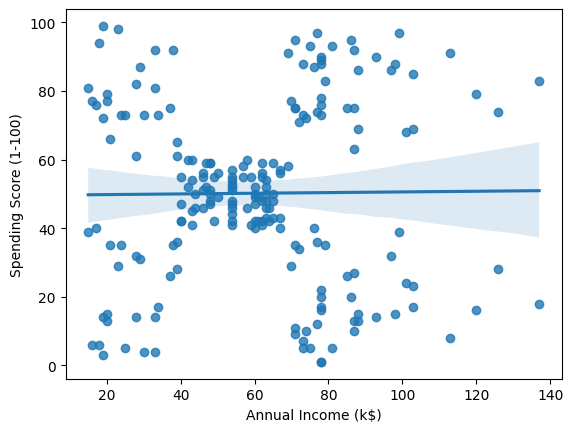

In [41]:
sns.regplot(x= mall_data['Annual Income (k$)'], y= mall_data['Spending Score (1-100)'])

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

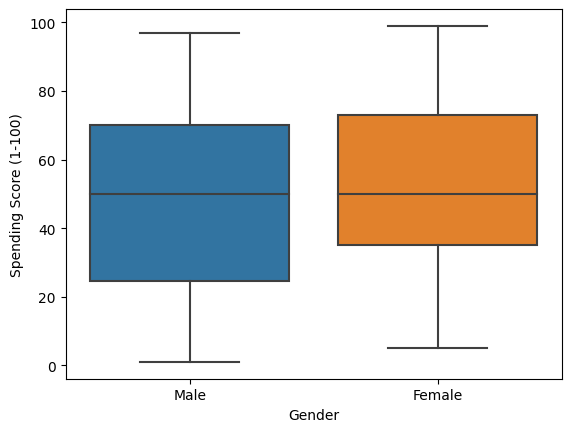

In [43]:
sns.boxplot(x= mall_data['Gender'], y= mall_data['Spending Score (1-100)'])

In [49]:
mall_data = mall_data.drop(columns = 'CustomerID')

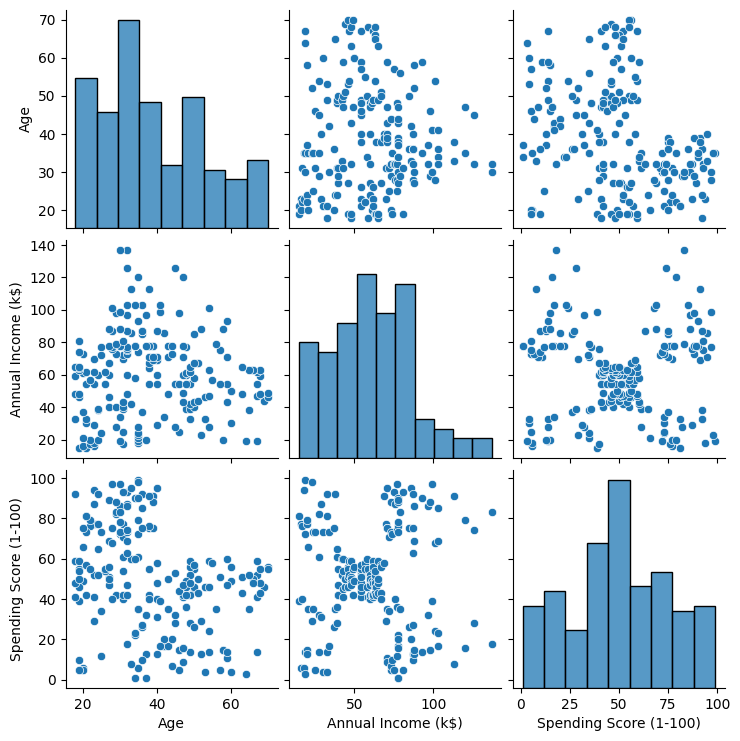

In [52]:
sns.pairplot(mall_data)

In [72]:
#Clustering and Segmenting

In [75]:
mall_data.columns


Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [79]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(mall_data[['Annual Income (k$)','Spending Score (1-100)' ]])
    inertias.append(kmeans.inertia_)

c:\Users\VICTOR ONUZURUIGBO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\VICTOR ONUZURUIGBO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\VICTOR ONUZURUIGBO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\VICTOR ONUZURUIGBO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` 

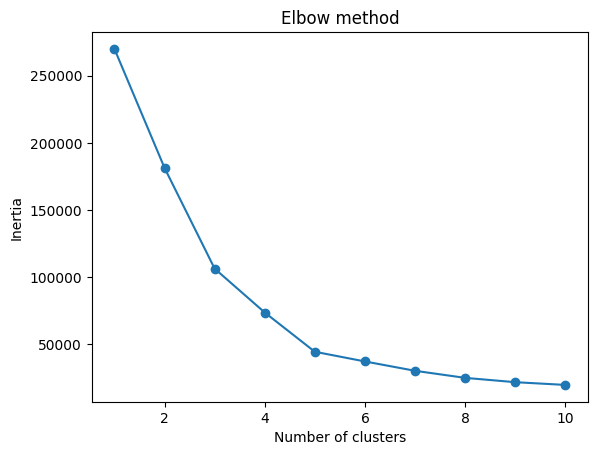

In [80]:
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [82]:
clustering1 = KMeans(n_clusters= 5)
clustering1.fit(mall_data[['Annual Income (k$)','Spending Score (1-100)' ]])
mall_data['Spending/Income Clusters'] = clustering1.labels_
mall_data

c:\Users\VICTOR ONUZURUIGBO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending/Income Clusters
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,2
197,Male,32,126,74,0
198,Male,32,137,18,2


<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

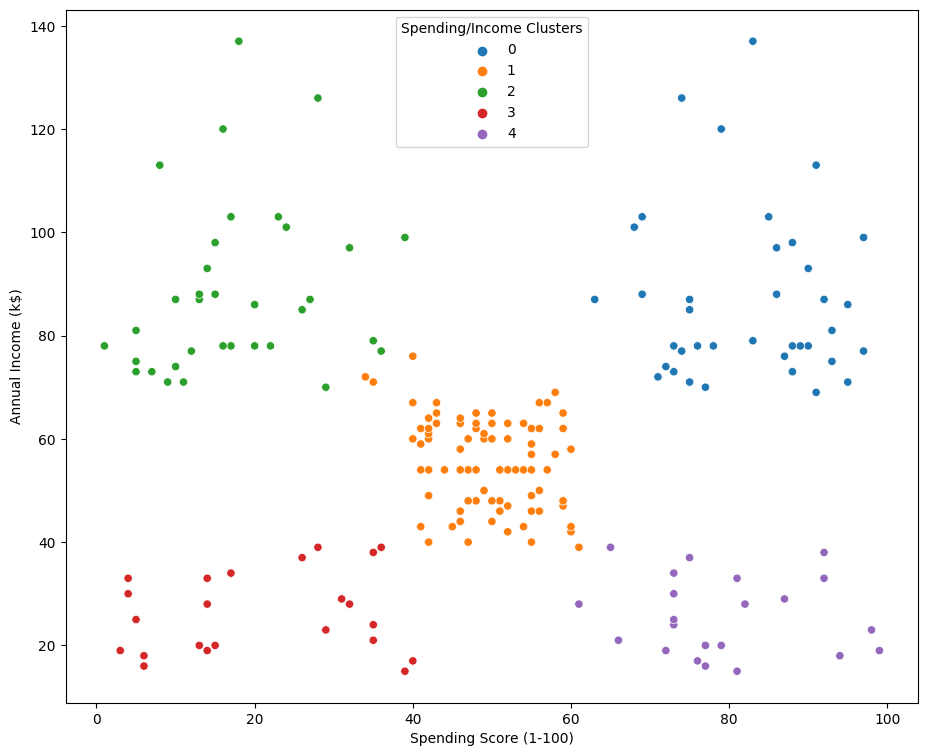

In [90]:
plt.figure(figsize= (11,9))
sns.scatterplot(data = mall_data, x = 'Spending Score (1-100)', y = 'Annual Income (k$)', hue = 'Spending/Income Clusters', palette= 'tab10')

In [98]:
mall_data.groupby(["Spending/Income Clusters"])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Spending/Income Clusters,,,
0,32.692308,86.538462,82.128205
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636
